# Computer Vision
Here the CMM networks will be described and compared with Fully connected layers. All algorithm will be shown on example from real food image database 

Below all steps will be demonstrated one by one

# Import dataset

In [ ]:
import zipfile

# Dowload a dataset in .zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unpack / unzip dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-18 22:54:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 142.251.16.128, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   168MB/s    in 0.6s    

2022-05-18 22:54:04 (168 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Visualize data
The dataset has been downloaded. To start working with it we must get know more about itself. To do so we must visualize data. To visualize it we must find how to open/operate with downloaded dataset first

**Database structure**

In [ ]:
# Look what is inside of downloaded database folder
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
s = !ls pizza_steak/train/pizza
print("Data type of list in folder: ", type(s))
print("First 50 characters of list: \n", s.nlstr[0:50])

Data type of list in folder:  <class 'IPython.utils.text.SList'>
First 50 characters of list: 
 1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg


In [ ]:
# Browse whole database folder
# with os.walk
import os

for root, dirs, files in os.walk("pizza_steak"):
  print(f"There are #{len(dirs)} directories and #{len(files)} files In the directory {root}")

There are #2 directories and #0 files In the directory pizza_steak
There are #2 directories and #0 files In the directory pizza_steak/test
There are #0 directories and #250 files In the directory pizza_steak/test/steak
There are #0 directories and #250 files In the directory pizza_steak/test/pizza
There are #2 directories and #0 files In the directory pizza_steak/train
There are #0 directories and #750 files In the directory pizza_steak/train/steak
There are #0 directories and #750 files In the directory pizza_steak/train/pizza


Now the structure of database seems to be more clear
```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```


**Load variables**

First of all, we are getting names of classes programmatically

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Now we create a helper function to view a random image from the set

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Run the cell below to view a random image

Image shape: (354, 512, 3)


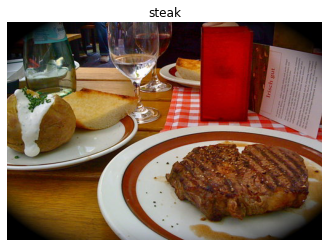

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

# CNN - Convolutional Neural Networks

### Typical architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

What we know so far abot data:

1.   It has 2 classes
2.   Train consists of 750 samples for each class and test has 250
3.   The samples has 3 colours but differ in size

From the paper on dataset we know that RF deals with classification with 50.76%, but we reduced classes to two, so we can't really compare them

Usually we build a baseline (RF) and then trying to beat it with new model



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 77s 2s/step - loss: 0.5730 - accuracy: 0.6920 - val_loss: 0.4005 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 88s 2s/step - loss: 0.4192 - accuracy: 0.8180 - val_loss: 0.3371 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.4171 - accuracy: 0.8060 - val_loss: 0.3337 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 89s 2s/step - loss: 0.3646 - accuracy: 0.8393 - val_loss: 0.3258 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 75s 2s/step - loss: 0.3292 - accuracy: 0.8700 - val_loss: 0.3160 - val_accuracy: 0.8640


In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7));

model_1.summary()

NameError: ignored

# CNN vs FeedForward
To realise advantages of CNN the results will be compared to feedworward neural networks

In [ ]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with 100 neurons
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),                                      
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="softmax")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 2.3520 - accuracy: 0.5000 - val_loss: 1.8499 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.8831 - accuracy: 0.5000 - val_loss: 0.8717 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.8432 - accuracy: 0.5000 - val_loss: 0.5351 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5612 - accuracy: 0.5000 - val_loss: 0.5918 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5264 - accuracy: 0.5000 - val_loss: 0.4466 - val_accuracy: 0.5000


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


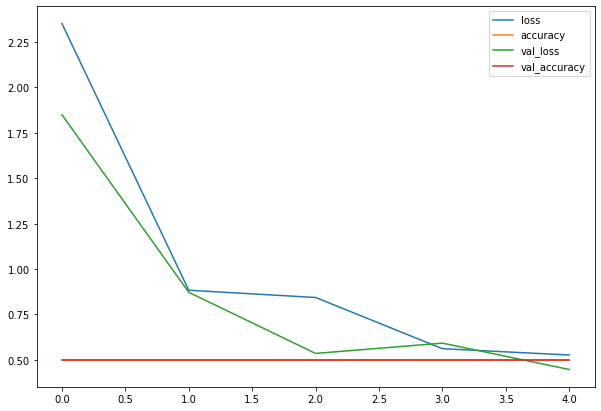

In [ ]:
model_2.summary()
pd.DataFrame(history_2.history).plot(figsize=(10,7));

In [ ]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 4.4578 - accuracy: 0.5927 - val_loss: 0.4992 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5799 - accuracy: 0.7280 - val_loss: 0.6375 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.5157 - accuracy: 0.7580 - val_loss: 0.4560 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4888 - accuracy: 0.7793 - val_loss: 0.4523 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4756 - accuracy: 0.7820 - val_loss: 0.4458 - val_accuracy: 0.7940


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               30105800  
                                                                 
 dense_7 (Dense)             (None, 500)               100500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 1)                 201       
                                                                 
Total params: 30,557,201
Trainable params: 30,557,201


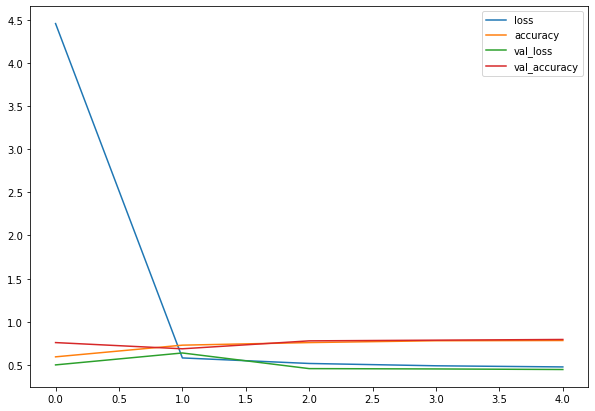

In [ ]:
model_3.summary()
pd.DataFrame(history_3.history).plot(figsize=(10,7));

In [ ]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_4 = model_4.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 11s 228ms/step - loss: 4.9029 - accuracy: 0.5747 - val_loss: 0.5574 - val_accuracy: 0.6940
Epoch 2/25
47/47 [==============================] - 10s 221ms/step - loss: 0.5777 - accuracy: 0.7167 - val_loss: 0.4651 - val_accuracy: 0.7760
Epoch 3/25
47/47 [==============================] - 10s 221ms/step - loss: 0.4759 - accuracy: 0.7807 - val_loss: 0.4505 - val_accuracy: 0.7880
Epoch 4/25
47/47 [==============================] - 10s 222ms/step - loss: 0.5131 - accuracy: 0.7560 - val_loss: 0.5552 - val_accuracy: 0.7680
Epoch 5/25
47/47 [==============================] - 10s 218ms/step - loss: 0.4907 - accuracy: 0.7720 - val_loss: 0.4401 - val_accuracy: 0.7840
Epoch 6/25
47/47 [==============================] - 10s 221ms/step - loss: 0.4169 - accuracy: 0.8040 - val_loss: 0.4606 - val_accuracy: 0.7820
Epoch 7/25
47/47 [==============================] - 10s 220ms/step - loss: 0.4656 - accuracy: 0.7780 - val_loss: 0.4725 - val_accuracy: 0.7740

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_11 (Dense)            (None, 200)               30105800  
                                                                 
 dense_12 (Dense)            (None, 500)               100500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 200)               100200    
                                                                 
 dense_15 (Dense)            (None, 1)                 201       
                                                                 
Total params: 30,557,201
Trainable params: 30,557,201


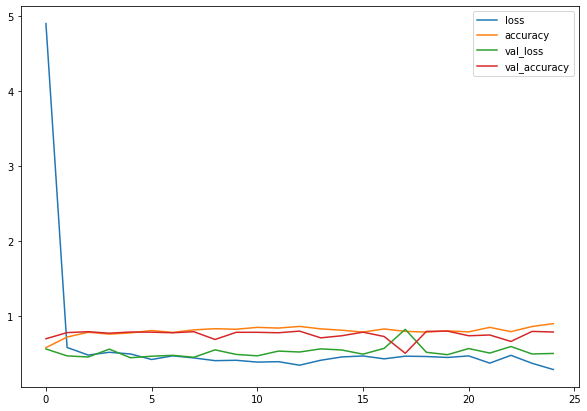

In [ ]:
model_4.summary()
pd.DataFrame(history_4.history).plot(figsize=(10,7));

It is clearly seen that increase in epochs doesn't benefit. Moreover, after 10 epichs the validation error starts rising fast which could be the result of overfitting.

***Summary***

1 CNN was tried and 3 Feed Forward NN were tried as well. Here are the results

Model | Parameters | Validation Accuracy | Epochs
--- | :---: | :---: | :---:
CNN | 31k | 87.8% | 5
FNN | 15M | 50% | 5 
FNN | 30M | 70% | 5
FNN | 30M | 74% | 25

So, as it could be observed from the table above, FNN even with 1000 times more parameters achieves less performance accuracy then CNN

> ⚡ It leads to another important consequence: "*More parameters - better*" isn't working. While it could be the case in other examples, here it is clear that CNN has less parameters and less possible patterns to learn, but it learns special and important, invariant to transition parameters which is more valuable in image analysis.




# Going down in CNN

## Part: 1 - Visualise data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


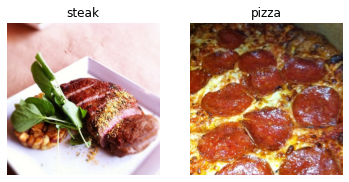

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
#plt.imshow(steak_img)
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
#plt.imshow(pizza_img)
#plt.show()

## Part: 2 - Preprocess the data

Here usually data divides to `training`, `validation` and `testing` sets. And a basic preprocessing applies here, in our case it is scaling (normalization)

In this particular database objects are already divided on sets. So the pathes to them are:

In [ ]:
train_dir = "pizza_steak/train/"
test_dir  = "pizza_steak/test/"

Now we prepare a generators to normalize data

Image generators will be applied right before passing data into the model

They have much more parameters and options for data augmentation (shift, zoom, rescale, flip, change color, etc)

In [ ]:
# Rescale generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen  = ImageDataGenerator(rescale = 1/255.)

Next step is to turn our data into ***batches***.

A ***batch*** is a mini set of data which model is using to look at at the same time. Let's say we have a batches of 16 images and we set 5 epochs. After diciding the data into batches we got 50 batches. It means each batch, one by one will go into a model to calculate the loss separately and all the batches will come again in next epochs. And again, and again (5 times)


> **Rule:** Batches number must be less then 32 


One of the advantages of using ImageDataGenerator is that it can reshape all images to the same resolution (named target_size). It is important as the images in given database are differ in resolution

In [ ]:
# Create batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels), images.shape, labels.shape

(32, 32, (32, 224, 224, 3), (32,))

So, according to the shapes above we see that train_data holds batches sized as 32 objects. We can see it as length on labels and images equals to 32.

Looking at the images shape it is clear that there are 32 images with the same resolution of 224x224 which have 3 colours.

In [ ]:
images[5]

array([[[0.2509804 , 0.36078432, 0.4156863 ],
        [0.25490198, 0.3647059 , 0.41960788],
        [0.26666668, 0.37254903, 0.43921572],
        ...,
        [0.227451  , 0.34117648, 0.41176474],
        [0.21960786, 0.33333334, 0.4039216 ],
        [0.23529413, 0.34901962, 0.41960788]],

       [[0.25490198, 0.3647059 , 0.41176474],
        [0.2627451 , 0.37254903, 0.427451  ],
        [0.27058825, 0.3803922 , 0.43529415],
        ...,
        [0.21960786, 0.33333334, 0.4039216 ],
        [0.21960786, 0.33333334, 0.4039216 ],
        [0.227451  , 0.34117648, 0.41176474]],

       [[0.2509804 , 0.36078432, 0.40784317],
        [0.26666668, 0.37647063, 0.43137258],
        [0.25882354, 0.36862746, 0.42352945],
        ...,
        [0.21960786, 0.33333334, 0.4039216 ],
        [0.227451  , 0.34117648, 0.41176474],
        [0.22352943, 0.3372549 , 0.40784317]],

       ...,

       [[0.6862745 , 0.72156864, 0.7019608 ],
        [0.6901961 , 0.7254902 , 0.7058824 ],
        [0.69411767, 0

> Above is representation of one of the images kept in batch. It is seen that it was normalized (0 to 1)



In [ ]:
labels

array([0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.],
      dtype=float32)

As expected, labels are binary numbers - 1 and 0. Which represents the pizza class and steak class

## Part: 3 - Building a model

We will start with basic model consisting with just 3 Conv layers and then we will increase complexity with cheching of the improvement. 

Basically, we are starting with creation of **baseline**

> 🔑 **Note:** In Deep Learning there are almost infoinite number of architectures you could create. So, one of the best ways to get started is to create a simple baseline and check if it is working with data. Then the architecture could become more complex and more reasonable, based on the baseline. To increase complexity the **research** of currently the best models is required. For example, a search of best current architecture for image classification can tell you how to create a good neural network for the field.

Sources to look at for a research


1.   Google scholar
2.   Papers with code





In [ ]:
# Making a model in easier way with many imports
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

# Create a 3 Conv Layers Baseline model
model_base = Sequential([
  Conv2D(filters = 10,
         kernel_size = 3,
         strides = 1,
         padding = 'valid',
         activation = 'relu',
         input_shape = (224,224,3)),
  Conv2D(10, 3, activation = 'relu'),
  Conv2D(10, 3, activation = 'relu'),
  Flatten(),
  Dense(1, activation="sigmoid")                                  
])

# Compile a model
model_base.compile(loss="binary_crossentropy",
                   optimizer = Adam(),
                   metrics = ["accuracy"])

# Check the architecture and number of parameters
model_base.summary()
print("Number of train and test batches of 32 images: ", len(train_data), len(test_data))


# Train the model
history_base = model_base.fit(train_data, # Combination of images and labels
                              epochs = 5,
                              steps_per_epoch = len(train_data), # Go through all batches for each of epochs *Could be changed!*
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              ) # callback = [tensorboard_callback] This callback helps plotting metrics

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________
Number of train and test batches of 32 images:  47

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.3139 - accuracy: 0.8780


[0.3139161467552185, 0.878000020980835]

In [ ]:
model_base.evaluate(test_data)

16/16 [==============================] - 2s 142ms/step - loss: 0.6305 - accuracy: 0.7560


[0.6304697394371033, 0.7559999823570251]

***Summary***: So, we built a baseline. It has 477k parameters and it performs with 75% accuracy. While the first model that we built with VGG architecture has 31k parameters and accuracy of 87%. There is definitely a way to increase a performance of current baseline. And this will be the aim of next sections

But first, a bit of `evaluation` of models. We will see *overfitting*

## Part: 4 - Evaluation

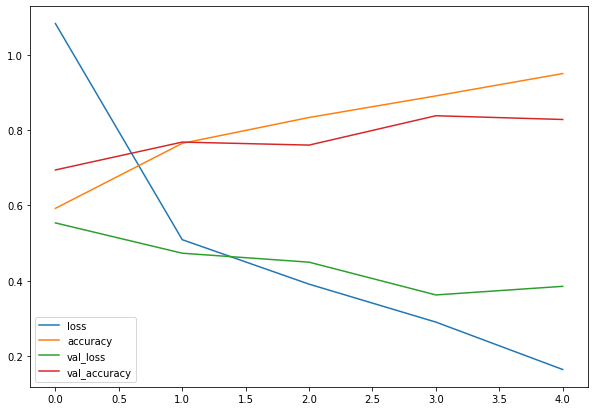

In [ ]:
# Plot learning curves
import pandas as pd
pd.DataFrame(history_base.history).plot(figsize=(10,7))

After the epoch #2 the validation loss starts increasing and validation accuracy dropping. It is due to the **overfitting**

It is a bit hard to see in the figure abive because there are too many lines

In [ ]:
pd.DataFrame(history_base.history)

,loss,accuracy,val_loss,val_accuracy
0,0.780674,0.661333,0.439301,0.792
1,0.378059,0.839333,0.439748,0.774
2,0.266837,0.901333,0.388202,0.824
3,0.111628,0.969333,0.467571,0.812
4,0.055385,0.988667,0.630470,0.756


In [24]:
# Plot validation and training curves separately
def plot_loss_curves(my_history):
  """
  Plots separate figures for training and validation metrics
  It is a helper function
  """
  loss = my_history.history["loss"]
  accuracy = my_history.history["accuracy"]
  val_loss = my_history.history["val_loss"]
  val_accuracy = my_history.history["val_accuracy"]

  epochs = range(len(loss))  # Length of any training metric gives the number of epochs

  # Plot Loss
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss,     label = "Training Loss"  )
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy,     label = "Training Accuracy"  )
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

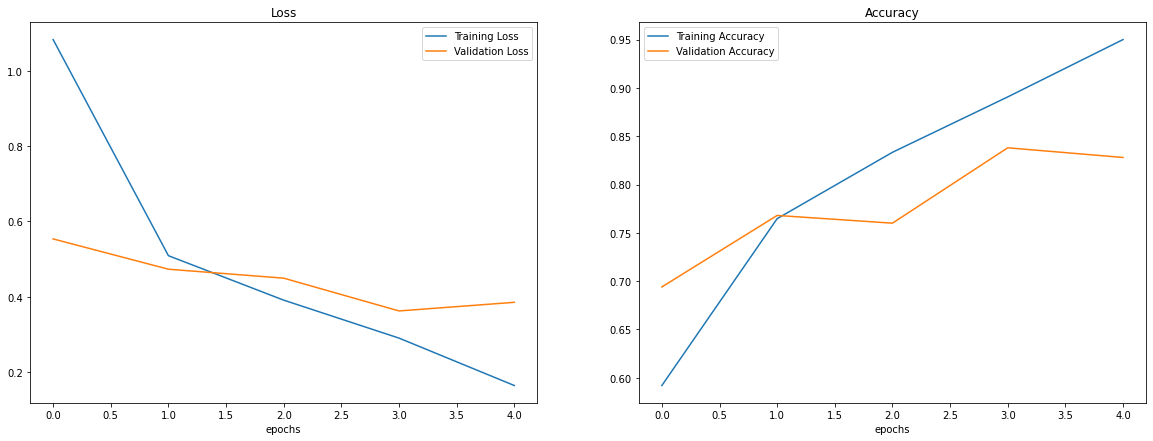

In [ ]:
plot_loss_curves(history_base)

> Now the **overfittin** can't be unseen. It is obvious the model trains to classify only training data, but it doesn't *generalize* rules for other data. The evidence for it is a low train error with *high validation error*

## Part: 5 - Updating a model: Regularization

We difined a problem with a model, it overfitts, it has many parameters and the accuracy could be better.

What could be a reason of overfitting:

* Increase the number of Conv layers (Make it deeper, more prefered)
* Increase the number of filters in Conv layers (Make it wider)
* Add another Dense layer at the end

Ways to deal with overfitting:

* Add data augmentation
* Add regularization layers (like Pooling)
* Add more data

To deal with some of the problems the pooling layer could be used

> 💪 While the *Convolutional* layer finds features in the image, *MaxPooling* layer selects only the most important of them. It helps the model with generalization

In [ ]:
# Make a model with regularisation layer based on Baseline
model_5 = Sequential([
  Conv2D(filters = 10,
         kernel_size=3,
         strides = 1,
         padding='valid',
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile a model
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

# Check the architecture
model_5.summary()

# Fit and train
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

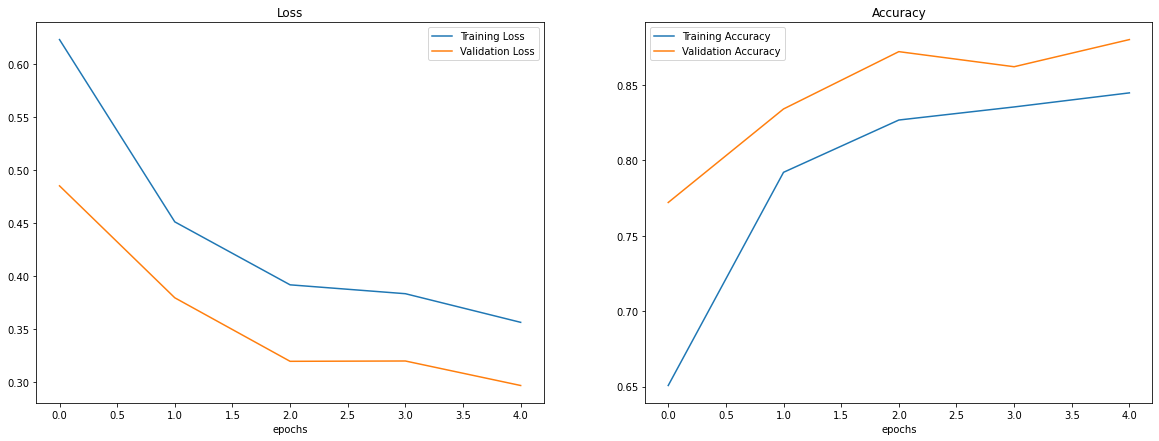

In [ ]:
plot_loss_curves(history_5)

***Summary:*** So, after including MaxPool regularization layers in the baseline the number of parameters dropped in **71 times** from 477k to 6.7k. Whereas the accuracy only increased from 75% to 85%, which is incredible! Also, analysing the figures above it is clear that overfitting is no longer present!

## Part: 6 - Data Augmentation

There are many *reasons* to use Data Augmentation, two of them are:

* The main goal when applying data augmentation is to **increase the generalizability** of the model.
* Data Augmentation is one of the way of preventing **overfitting**

> 🔑 **Note:** Data augmentation is usally only performed on the training data.


In [ ]:
# Create ImageDataGenerator for training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,     # Rotates an image in range 0-20 degrees
                                             shear_range = 0.2,       # Shears / cropps an image
                                             zoom_range = 0.2,        # Zooms into the image up to +20%
                                             width_shift_range = 0.2, # Shift the image by width
                                             height_shift_range = 0.2,# Shift the image by height
                                             horizontal_flip= True)   # Flips an image horizontally

# Create ImageDataGenerator for training with no data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator for testing data  - preprocessing only, no augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Specify which data to preprocess and augment
# Specify the proper resolution and batch size
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224,224),
                                                         batch_size = 32,
                                                         class_mode = 'binary',
                                                         shuffle = False)           # Shuffle is False for visualisation only
# Create the same data but with no augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               shuffle = False)

# Create testing data with no augmentation
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224,224),
                                             class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data), len(train_data_augmented)

(47, 47)

Visualization of data augmentation

In [ ]:
# Get non-augmented and augmented data
# PS: There is no need to store labels twice, as shuffling is disabled
images, labels = train_data.next()
images_augmented, _ = train_data_augmented.next()

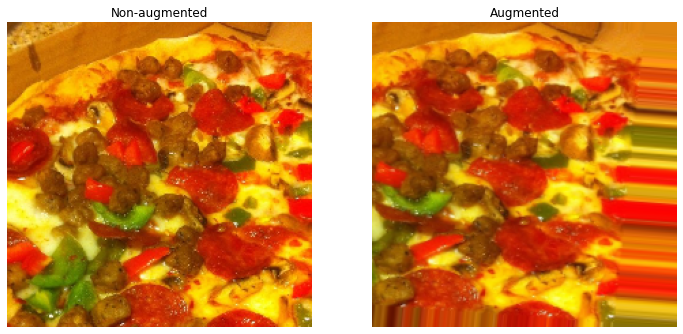

In [ ]:
import random

# Get one of the image from the given batch "images"
random_number = random.randint(0,31) 

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.axis(False)
plt.title('Non-augmented')
plt.subplot(1,2,2)
plt.imshow(images_augmented[random_number])
plt.axis(False)
plt.title('Augmented')
plt.show()

So, basically, the training data was replaced by augmented data, not increased with it. 

> Each of the training data got some of transfromations - transition, rotation, zoom, etc. This training set will go to a model, without an original one

## Part: 7 - Updating a model: Data Augmentation

I am doing nothing, but creating absolutely the same model as before, but with augmented data instead of original. 

The quantity of the data keeps the same. 

While rotation, shifting, zooming and other augmentation should regularize the model, prevent it from overfitting and make it more generalized!

> 🔑***Note:*** The learning process may take longer time because the data augments on the flight, right before being fit to a model

In [ ]:
# Make a model with regularisation layer based on Baseline
model_6 = Sequential([
  Conv2D(filters = 10,
         kernel_size=3,
         strides = 1,
         padding='valid',
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile a model
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

# Check the architecture
model_6.summary()

# Fit and train
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

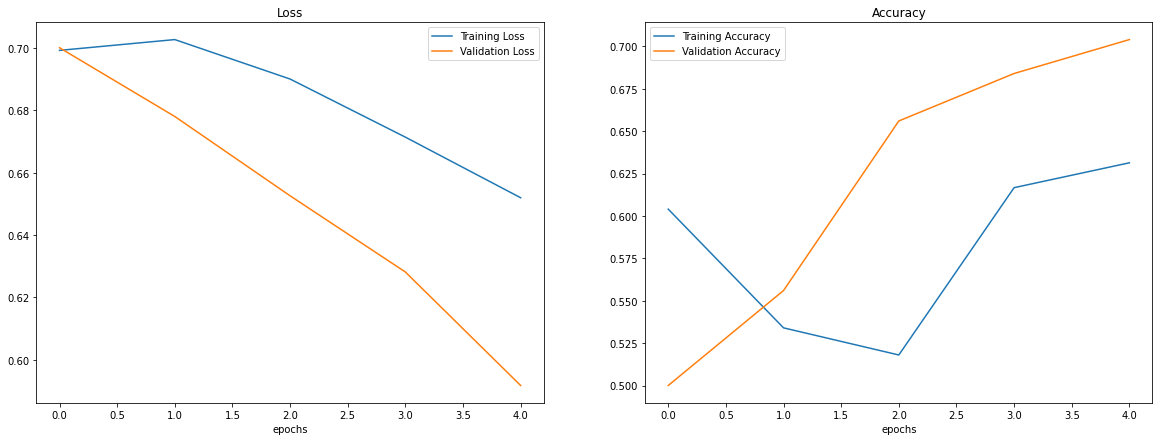

In [ ]:
plot_loss_curves(history_6)

There are many possible reasons on why out model has such a bad performance

It can be explained by

* Turning the Shuffle off. After it batches mostly consisted of 32 images from a single class, which is absolutely wrong in terms of learning process
* Using too much of augmentation. Too many types of augmentation or too high values for augmentation

Let's try to solve them one by one. We will start with suffling!

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224,224),
                                                         batch_size = 32,
                                                         class_mode = 'binary',
                                                         shuffle = True)

# Make a model with regularisation layer based on Baseline
model_7 = Sequential([
  Conv2D(filters = 10,
         kernel_size=3,
         strides = 1,
         padding='valid',
         activation="relu",
         input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation = "sigmoid")
])

# Compile a model
model_7.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit and train
history_7 = model_7.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6352 - accuracy: 0.6473 - val_loss: 0.4603 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5116 - accuracy: 0.7607 - val_loss: 0.3727 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4767 - accuracy: 0.7680 - val_loss: 0.4249 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4702 - accuracy: 0.7807 - val_loss: 0.3758 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4500 - accuracy: 0.7967 - val_loss: 0.3418 - val_accuracy: 0.8580


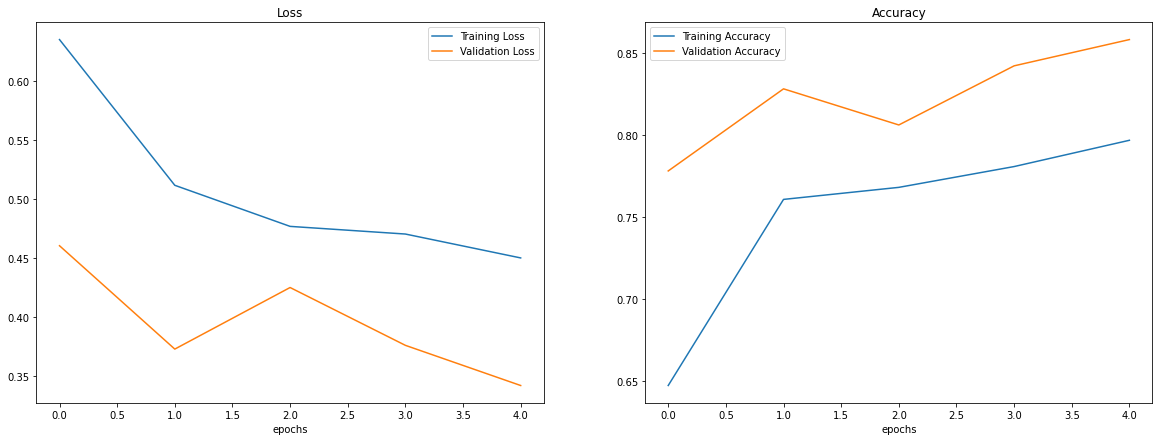

In [ ]:
plot_loss_curves(history_7)

***Summary:*** So, after applying the augmented data no performance increase was found, but the ovverfitting was prevented and model was more likely to learn general rules, applied for real world problems

> While the time for training remained the same. But, hopefully, the model became more generalized and robust for real life applications

## Part: 8 - Updating a model: Repeat untill satisfied

How the model performance han be improved?

* Increase the number of layers (more `Conv2D`/`MaxPool`)
* Increase the number of hidden units (10, 32, 64)
* Train for longer (more epochs)
* Find ideal learning rate
* Use **transfer learning**
* Get more data, if possible

So, the first step I will make is I will take the architecture of `model_1` as it performed pretty well and then check if performance increase with augmented data

Initially the accuracy of `model_1` is 86.4%

In [ ]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 480ms/step - loss: 0.6441 - accuracy: 0.6107 - val_loss: 0.4403 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5149 - accuracy: 0.7513 - val_loss: 0.4467 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4861 - accuracy: 0.7747 - val_loss: 0.4091 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4776 - accuracy: 0.7727 - val_loss: 0.3560 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4456 - accuracy: 0.7993 - val_loss: 0.3333 - val_accuracy: 0.8700


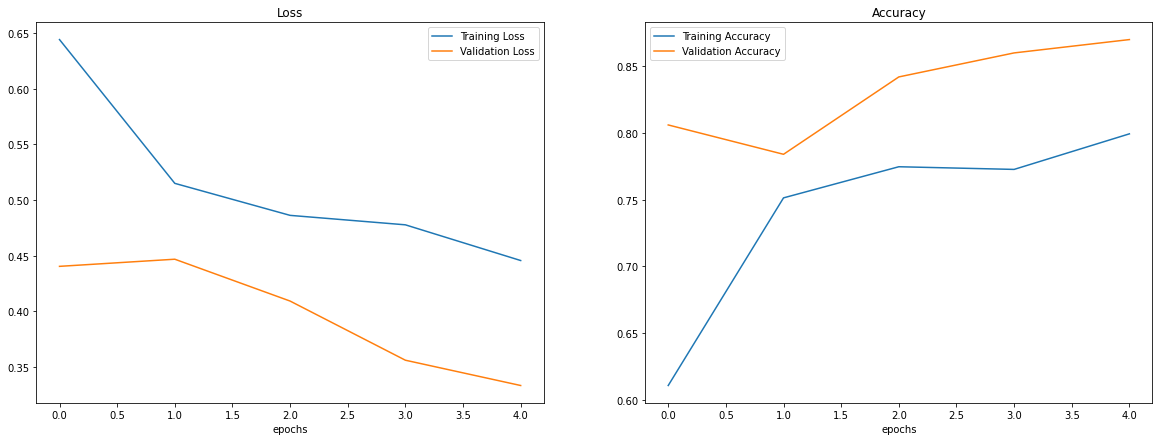

In [ ]:
plot_loss_curves(history_1)

The accuracy increased from 86.4% to 87%

It is not a lot and could be just an error deviation

As usage of such regularisation make no effect or improvement of accuracy, then augmented data will be used further for other models

The next step will be a try to increase the number of layers

The idea behind of it it that more scaled/big features will be learned with more `Conv2D`/`MaxPool` pairs

In [ ]:
# Create a CNN model with mode layers
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 488ms/step - loss: 0.6666 - accuracy: 0.5760 - val_loss: 0.5398 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5741 - accuracy: 0.7053 - val_loss: 0.4773 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5520 - accuracy: 0.7460 - val_loss: 0.4285 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5333 - accuracy: 0.7433 - val_loss: 0.4424 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5230 - accuracy: 0.7507 - val_loss: 0.3959 - val_accuracy: 0.8460


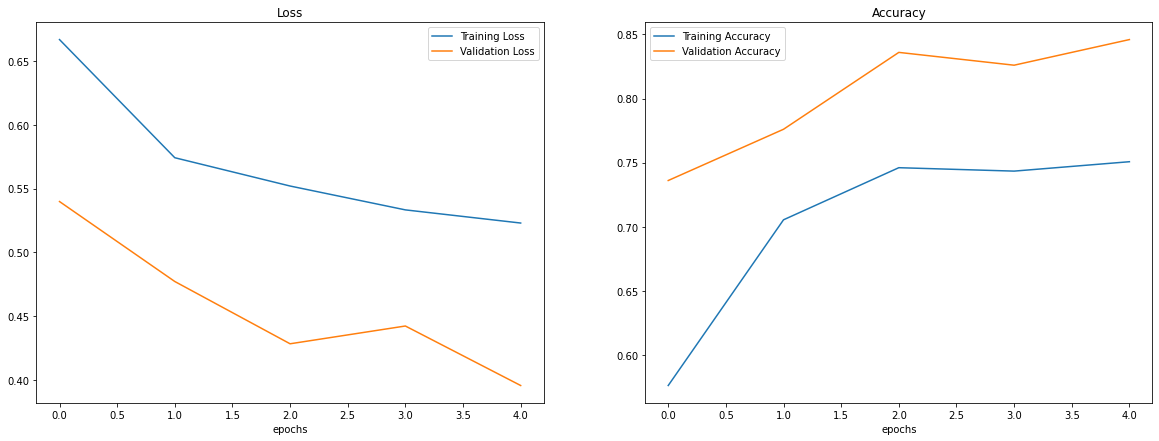

In [ ]:
plot_loss_curves(history_8)

The accuracy decresed from 87% to 84.6%

The model could learn for longer. At least it worth trying

In [ ]:
# Create a CNN model with more layers
model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 487ms/step - loss: 0.6711 - accuracy: 0.5693 - val_loss: 0.6825 - val_accuracy: 0.5640
Epoch 2/10
47/47 [==============================] - 22s 471ms/step - loss: 0.6387 - accuracy: 0.6413 - val_loss: 0.6110 - val_accuracy: 0.6600
Epoch 3/10
47/47 [==============================] - 22s 477ms/step - loss: 0.6011 - accuracy: 0.6787 - val_loss: 0.5105 - val_accuracy: 0.7700
Epoch 4/10
47/47 [==============================] - 23s 480ms/step - loss: 0.5376 - accuracy: 0.7333 - val_loss: 0.3986 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 22s 475ms/step - loss: 0.5181 - accuracy: 0.7467 - val_loss: 0.3997 - val_accuracy: 0.8380
Epoch 6/10
47/47 [==============================] - 22s 475ms/step - loss: 0.4671 - accuracy: 0.7813 - val_loss: 0.3317 - val_accuracy: 0.8720
Epoch 7/10
47/47 [==============================] - 22s 473ms/step - loss: 0.4612 - accuracy: 0.7920 - val_loss: 0.3658 - val_accuracy: 0.8500

In [ ]:
model_9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

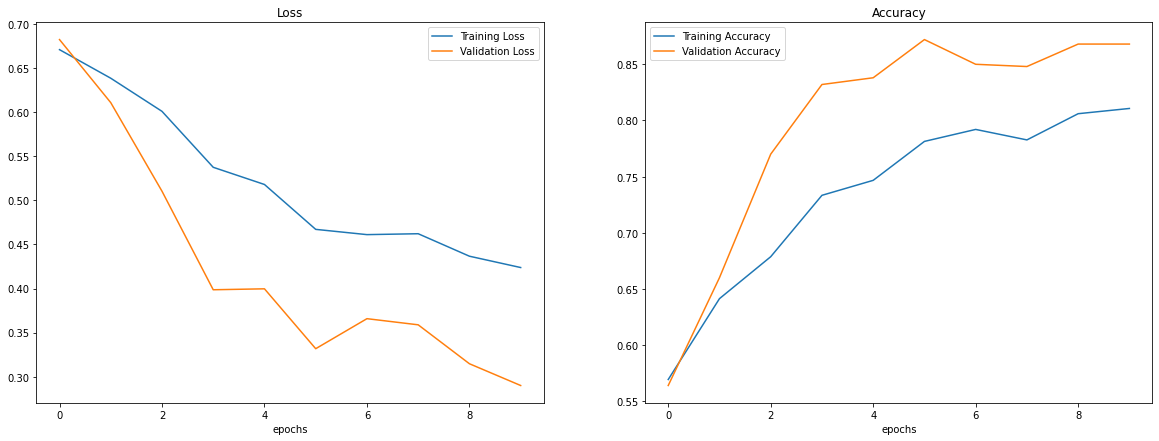

In [ ]:
plot_loss_curves(history_9)

Now it is much more clear that model reachet it's own threshold of accuracy.

So, the result of accuracy is a bit bigger then it was in original `model_1`  86.8% but with 10k parameters

Another try could be applied with increase of hidden units

In [ ]:
# Create a CNN model with more hidden units
model_10 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 506ms/step - loss: 0.6829 - accuracy: 0.5480 - val_loss: 0.5649 - val_accuracy: 0.8120
Epoch 2/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5763 - accuracy: 0.7093 - val_loss: 0.4689 - val_accuracy: 0.8100
Epoch 3/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5271 - accuracy: 0.7473 - val_loss: 0.4114 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5263 - accuracy: 0.7547 - val_loss: 0.3706 - val_accuracy: 0.8520
Epoch 5/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5067 - accuracy: 0.7773 - val_loss: 0.3474 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5116 - accuracy: 0.7460 - val_loss: 0.3791 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 23s 494ms/step - loss: 0.4860 - accuracy: 0.7793 - val_loss: 0.3796 - val_accuracy: 0.8500

In [ ]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      2890      
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

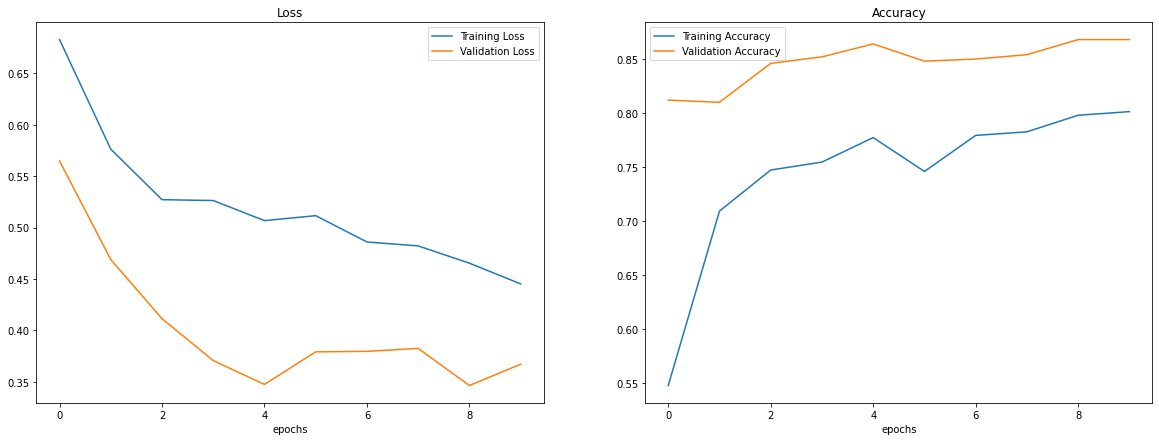

In [ ]:
plot_loss_curves(history_10)

Okay, so while accuracy hasn't increased and staied exactly on 86.8%, the speed of learning process doubled! As well as a number of parameters a model has

It worth trying to increase hidden units even more

In [ ]:
# Create a CNN model with more even hidden units
model_11 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_11.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 496ms/step - loss: 0.6299 - accuracy: 0.6353 - val_loss: 0.4070 - val_accuracy: 0.8420
Epoch 2/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5622 - accuracy: 0.7467 - val_loss: 0.4751 - val_accuracy: 0.8160
Epoch 3/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5475 - accuracy: 0.7427 - val_loss: 0.4212 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 484ms/step - loss: 0.5178 - accuracy: 0.7673 - val_loss: 0.3893 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5210 - accuracy: 0.7607 - val_loss: 0.3996 - val_accuracy: 0.8460
Epoch 6/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5024 - accuracy: 0.7720 - val_loss: 0.3997 - val_accuracy: 0.8420
Epoch 7/10
47/47 [==============================] - 23s 486ms/step - loss: 0.5052 - accuracy: 0.7587 - val_loss: 0.3908 - val_accuracy: 0.8700

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_39 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_41 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

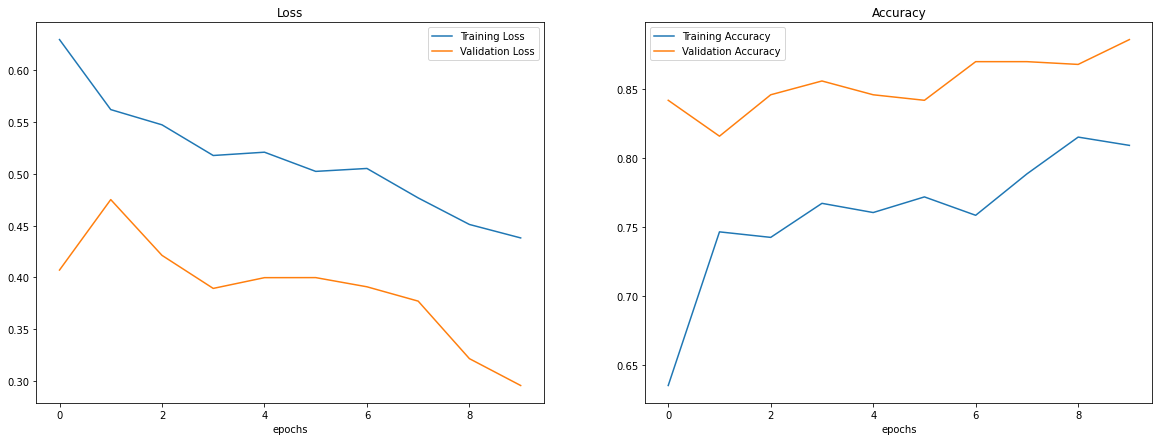

In [ ]:
model_11.summary()
plot_loss_curves(history_11)

Performance is increased slightly.

Worth trying change the size of filters to look for more scaled image features

In [ ]:
# Create a CNN model with more even hidden units
model_12 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_12.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 497ms/step - loss: 0.6964 - accuracy: 0.5533 - val_loss: 0.6213 - val_accuracy: 0.6720
Epoch 2/10
47/47 [==============================] - 23s 490ms/step - loss: 0.6135 - accuracy: 0.6933 - val_loss: 0.5968 - val_accuracy: 0.7180
Epoch 3/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5824 - accuracy: 0.7293 - val_loss: 1.1114 - val_accuracy: 0.5020
Epoch 4/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5754 - accuracy: 0.7333 - val_loss: 0.4320 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5280 - accuracy: 0.7520 - val_loss: 0.4505 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 23s 490ms/step - loss: 0.5251 - accuracy: 0.7560 - val_loss: 0.3962 - val_accuracy: 0.8500
Epoch 7/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5061 - accuracy: 0.7780 - val_loss: 0.3798 - val_accuracy: 0.8560

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_45 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 106, 106, 32)      25632     
                                                                 
 conv2d_47 (Conv2D)          (None, 102, 102, 32)      25632     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 51, 51, 32)       0         
 g2D)                                                

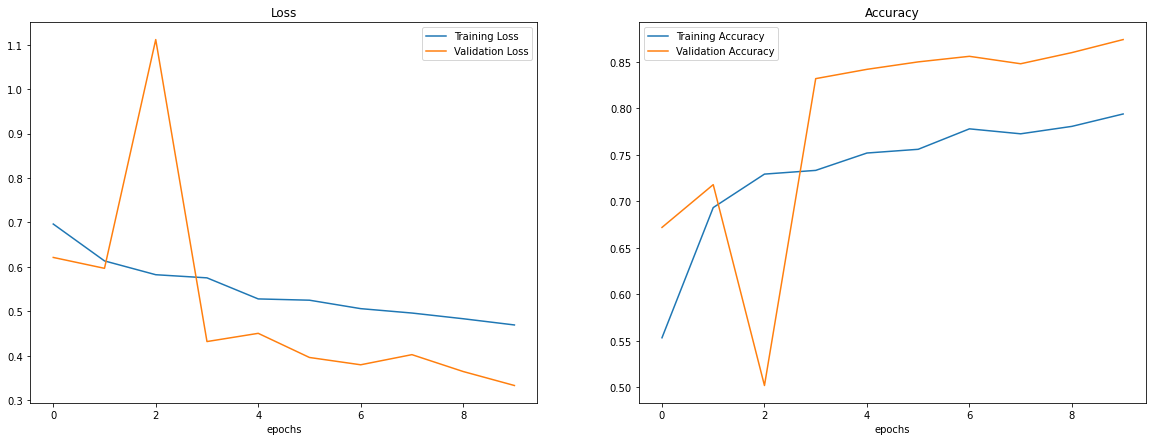

In [ ]:
model_12.summary()
plot_loss_curves(history_12)

The figure of learning is much more smooth with increasing number of parameters. Why not to try to increase the number of layers again?

In [ ]:
# Create a CNN model with more even hidden units
model_13 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 5, activation="relu"),
  tf.keras.layers.Conv2D(10, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_13.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 496ms/step - loss: 0.6735 - accuracy: 0.5853 - val_loss: 0.5738 - val_accuracy: 0.7760
Epoch 2/10
47/47 [==============================] - 23s 486ms/step - loss: 0.6136 - accuracy: 0.6887 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 3/10
47/47 [==============================] - 23s 488ms/step - loss: 0.5362 - accuracy: 0.7433 - val_loss: 0.4329 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5012 - accuracy: 0.7740 - val_loss: 0.3984 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 23s 486ms/step - loss: 0.4895 - accuracy: 0.7840 - val_loss: 0.3738 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 23s 489ms/step - loss: 0.4784 - accuracy: 0.7793 - val_loss: 0.3736 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 23s 487ms/step - loss: 0.4907 - accuracy: 0.7853 - val_loss: 0.4378 - val_accuracy: 0.8380

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_51 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_53 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

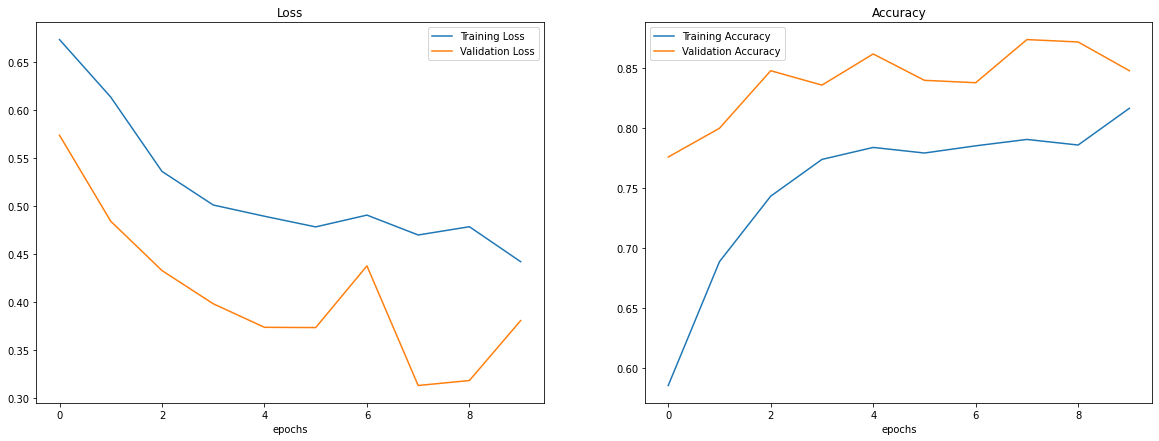

In [ ]:
model_13.summary()
plot_loss_curves(history_13)

The increase of parameters didn't show a big difference in performance. That is why it was decided to go back to `model_12` architecture

Now it is time to find ideal learning rate and see if it has influence of performance

To find the ideal learning rate I will use the approach that I tried in notes for classification.

The callback will be called after each epoch. It will geometrically increase the learning rate. To cover a broad range of learning rates the number of epochs was dramatically increased in accordance to the callback formula

The history of learning curves over learning rate will point out on perfect value


In [ ]:
# Create a CNN model with more even hidden units
model_14 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_14.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Learning rate starts from 0.0001 and rises as * 10^(1/20)
callback_lrn = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 20**(epoch/20)
)

# Fit the model
history_14 = model_14.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[callback_lrn])

Epoch 1/20
47/47 [==============================] - 24s 498ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5860 - lr: 1.0000e-05
Epoch 2/20
47/47 [==============================] - 23s 489ms/step - loss: 0.6895 - accuracy: 0.6107 - val_loss: 0.6853 - val_accuracy: 0.6120 - lr: 1.1616e-05
Epoch 3/20
47/47 [==============================] - 23s 490ms/step - loss: 0.6838 - accuracy: 0.5793 - val_loss: 0.6706 - val_accuracy: 0.5780 - lr: 1.3493e-05
Epoch 4/20
47/47 [==============================] - 23s 489ms/step - loss: 0.6693 - accuracy: 0.6453 - val_loss: 0.6296 - val_accuracy: 0.7520 - lr: 1.5673e-05
Epoch 5/20
47/47 [==============================] - 23s 489ms/step - loss: 0.6323 - accuracy: 0.6713 - val_loss: 0.5550 - val_accuracy: 0.7600 - lr: 1.8206e-05
Epoch 6/20
47/47 [==============================] - 23s 491ms/step - loss: 0.6023 - accuracy: 0.6800 - val_loss: 0.5175 - val_accuracy: 0.7840 - lr: 2.1147e-05
Epoch 7/20
47/47 [======================

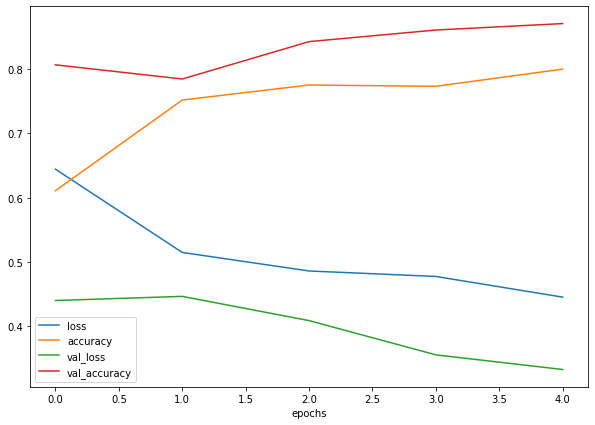

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7), xlabel="epochs")
plt.show()

The decrease of loss started almost immediately.

Now let's test how the model will perform with changed learning rate

In [ ]:
# Create a CNN model with more even hidden units
model_15 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_15.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00014),
              metrics=["accuracy"])

# Fit the model
history_15 = model_15.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 29s 494ms/step - loss: 0.6677 - accuracy: 0.5733 - val_loss: 0.6099 - val_accuracy: 0.5760
Epoch 2/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5861 - accuracy: 0.7093 - val_loss: 0.4341 - val_accuracy: 0.8440
Epoch 3/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5359 - accuracy: 0.7473 - val_loss: 0.4220 - val_accuracy: 0.7920
Epoch 4/10
47/47 [==============================] - 23s 492ms/step - loss: 0.5108 - accuracy: 0.7573 - val_loss: 0.3648 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 23s 485ms/step - loss: 0.4575 - accuracy: 0.8013 - val_loss: 0.3323 - val_accuracy: 0.8740
Epoch 6/10
47/47 [==============================] - 23s 485ms/step - loss: 0.4847 - accuracy: 0.7707 - val_loss: 0.3319 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 23s 487ms/step - loss: 0.4442 - accuracy: 0.7980 - val_loss: 0.3590 - val_accuracy: 0.8460

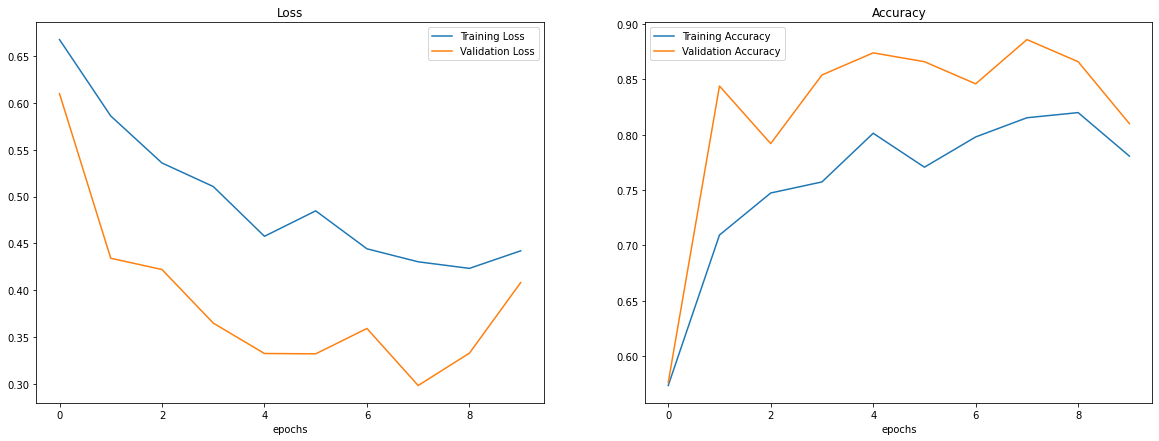

In [ ]:
plot_loss_curves(history_15)

Try another possible ideal learning rate

As the learning rate will be decreased - I increased epochs count

In [ ]:
# Create a CNN model with more even hidden units
model_16 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 5, activation="relu"),
  tf.keras.layers.Conv2D(32, 5, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_16.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00008),
              metrics=["accuracy"])

# Fit the model
history_16 = model_16.fit(train_data_augmented,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
47/47 [==============================] - 24s 495ms/step - loss: 0.6918 - accuracy: 0.5220 - val_loss: 0.6804 - val_accuracy: 0.5160
Epoch 2/15
47/47 [==============================] - 23s 488ms/step - loss: 0.6458 - accuracy: 0.6453 - val_loss: 0.5115 - val_accuracy: 0.7680
Epoch 3/15
47/47 [==============================] - 23s 487ms/step - loss: 0.5536 - accuracy: 0.7220 - val_loss: 0.4216 - val_accuracy: 0.8300
Epoch 4/15
47/47 [==============================] - 23s 486ms/step - loss: 0.5392 - accuracy: 0.7400 - val_loss: 0.3854 - val_accuracy: 0.8440
Epoch 5/15
47/47 [==============================] - 23s 491ms/step - loss: 0.4917 - accuracy: 0.7727 - val_loss: 0.4320 - val_accuracy: 0.7880
Epoch 6/15
47/47 [==============================] - 23s 488ms/step - loss: 0.4566 - accuracy: 0.7920 - val_loss: 0.3702 - val_accuracy: 0.8440
Epoch 7/15
47/47 [==============================] - 23s 487ms/step - loss: 0.4594 - accuracy: 0.7880 - val_loss: 0.3798 - val_accuracy: 0.8480

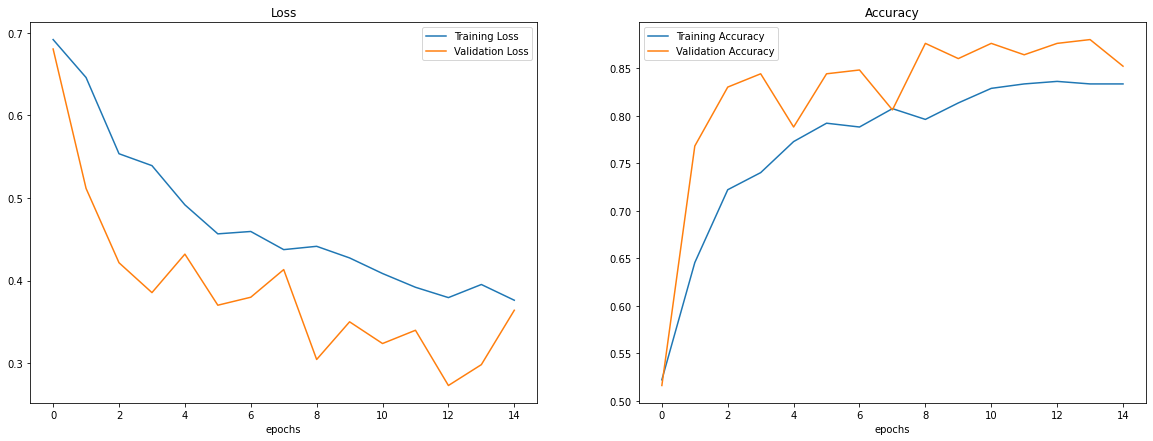

In [ ]:
plot_loss_curves(history_16)

The highest possible accuracy is 88%, which was reached in previous models

Currently, the best model was `model_11` and the last experiment I want to conduct is to pass found learning rate to `model_11` and check the performance

In [ ]:
# Create a CNN model with more even hidden units
model_17 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_17.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00008),
              metrics=["accuracy"])

# Fit the model
history_17 = model_17.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 497ms/step - loss: 0.6878 - accuracy: 0.5287 - val_loss: 0.6629 - val_accuracy: 0.5460
Epoch 2/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6305 - accuracy: 0.6587 - val_loss: 0.5301 - val_accuracy: 0.7660
Epoch 3/10
47/47 [==============================] - 23s 491ms/step - loss: 0.5856 - accuracy: 0.6853 - val_loss: 0.4922 - val_accuracy: 0.7840
Epoch 4/10
47/47 [==============================] - 23s 495ms/step - loss: 0.5494 - accuracy: 0.7220 - val_loss: 0.4741 - val_accuracy: 0.7860
Epoch 5/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5287 - accuracy: 0.7413 - val_loss: 0.4745 - val_accuracy: 0.7540
Epoch 6/10
47/47 [==============================] - 23s 489ms/step - loss: 0.5160 - accuracy: 0.7313 - val_loss: 0.4226 - val_accuracy: 0.8080
Epoch 7/10
47/47 [==============================] - 23s 491ms/step - loss: 0.4748 - accuracy: 0.7787 - val_loss: 0.3916 - val_accuracy: 0.8400

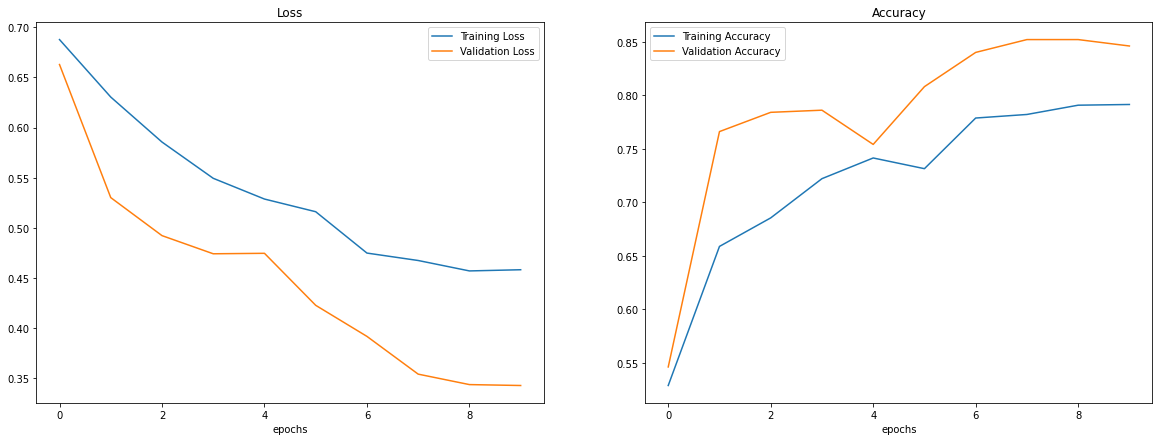

In [ ]:
plot_loss_curves(history_17)

**Summary:** The best performance of 88.6% accuracy was reached with `model_11`
* It used Augmented data
* The data was normalized
* The architecture: *shown below*
* The number of epochs was increased from 5 to 10
* The number of hidden units was increased from 10 to 32
* The number of layers was increased with two `Conv2D` and one `MaxPool`
* The kernel size remained to be 3


In [ ]:
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_39 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_41 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

## Part: 9 - Model performance on real images

To make able to pass any image to a model we must make a function to automatically scale it, reshape and convert to tensor

In [ ]:
def load_scale_and_reshape(img_path, img_size=224):
  """
  The function takes a path to an image and returns an image in a 
  Tensor format with proper scaling and reshaped for a model
  """
  # Load an image
  img = tf.io.read_file(img_path)
  # Decode an image to tensor and ensure 3 channels
  img = tf.image.decode_image(img, channels=3)
  # Resize an image
  img = tf.image.resize(img, size=[img_size, img_size])
  # Scale an image
  img = img / 255.

  return img

Now I load an image, view it first

--2022-05-19 00:48:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-05-19 00:48:52 (179 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



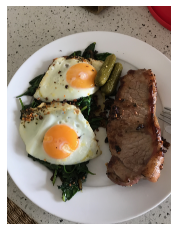

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

An image has a high resolution!

In [ ]:
steak.shape

(4032, 3024, 3)

Then preprocess with a helper function

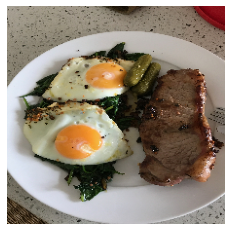

In [ ]:
steak_preprocessed = load_scale_and_reshape("03-steak.jpeg")
plt.imshow(steak_preprocessed)
plt.axis(False);

In [ ]:
steak_preprocessed.shape

TensorShape([224, 224, 3])

And now I pass an image to the model

But the model expects batch. To deal with it the dimention expension is needed

In [ ]:
steak_pass_ready = tf.expand_dims(steak_preprocessed, axis=0)

print(f"Model #11 sure that it is steak on {model_11.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #12 sure that it is steak on {model_12.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #13 sure that it is steak on {model_13.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #14 sure that it is steak on {model_14.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #15 sure that it is steak on {model_15.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #16 sure that it is steak on {model_16.predict(steak_pass_ready)[0][0]}%", )
print(f"Model #17 sure that it is steak on {model_17.predict(steak_pass_ready)[0][0]}%", )

Model #11 sure that it is steak on 0.8462905287742615%
Model #12 sure that it is steak on 0.7704675793647766%
Model #13 sure that it is steak on 0.8266788721084595%
Model #14 sure that it is steak on 0.8443900942802429%
Model #15 sure that it is steak on 0.9477452635765076%
Model #16 sure that it is steak on 0.974734365940094%
Model #17 sure that it is steak on 0.8230396509170532%


It may be just an occasion, but according to the probabilities of photo consisting a steak the most confident models are the models with the ideal learning rate. 

While the best accuracy performance was in `model_11` of 88.6%, the highest confidence is in `model_16` with accuracy of 85.2%.

It might be just an occasion, but also maybe the model with ideal learning rate gain more generalization then other model

The last thing is to output the class instead of a probability

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(model_11.predict(steak_pass_ready)))]
pred_class

'steak'

In [ ]:
def predict_and_plot(model, img_path, class_names=class_names):
  """
  It loads an image, makes preprocessing
  Using a model makes a prediction of a class of a model
  And plots an image with assigned class and probability of it
  """
  img = load_scale_and_reshape(img_path)
  img_pass = tf.expand_dims(img, axis=0)
  probability = model.predict(img_pass)
  pred_class = class_names[int(tf.round(probability))]
  if probability < 0.5:
    probability = 1 - probability
  plt.figure()
  plt.imshow(img)
  plt.title(pred_class + " " + "{:.1f}".format(100*probability[0][0]) + "%")
  plt.axis(False)

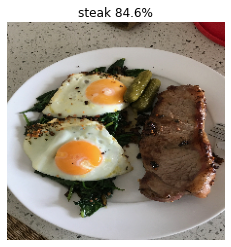

In [ ]:
predict_and_plot(model_11, "03-steak.jpeg")

--2022-05-19 01:19:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.10’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-05-19 01:19:01 (281 MB/s) - ‘03-pizza-dad.jpeg.10’ saved [2874848/2874848]



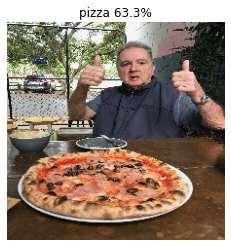

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
predict_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

I assume that even when model_11 outperforms other models with accuracy of 88.6%, 

the model_16 is much more confident an I should use it instead

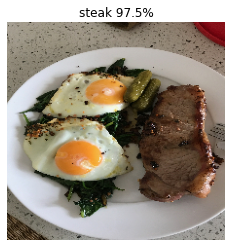

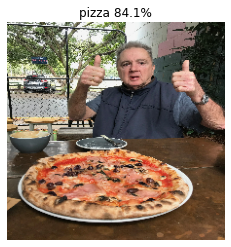

In [ ]:
predict_and_plot(model_16, "03-steak.jpeg")
predict_and_plot(model_16, "03-pizza-dad.jpeg", class_names)

Confidence of 97.5% over 84.6% for Steak!

Confidence of 84.1% over 63.3% for pizza!

It is definitely much smarter then `model_11`

It can be also explained by use of Augmented data in `model_16` and ideal Learning rate

**Conclusion:** The best models are `model_11` and `model_16`

# Multiclass Classification 

Now I repeatthe process for multiclass classification

## Getting familiarized with the data

First, I download the dataset

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-05-31 18:56:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   148MB/s    in 3.5s    

2022-05-31 18:56:26 (141 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Zipped archive must be unzipped

In [3]:
path_to_zip_file = "/content/10_food_classes_all_data.zip"
directory_to_extract_to = "/content"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

Now I can investigate it

I will start by browsing the folders and checking the content

In [6]:
import os

path = "10_food_classes_all_data"

for root, dirs, files in os.walk(path, topdown=False):
   print(f"There are {len(dirs)} directories and {len(files)} photos in {root}")

There are 0 directories and 250 photos in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 photos in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 photos in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 photos in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 photos in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 photos in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 photos in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 photos in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 photos in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 photos in 10_food_classes_all_data/test/steak
There are 10 directories and 0 photos in 10_food_classes_all_data/test
There are 0 directories and 750 photos in 10_food_classes_all_data/train/fried_rice
There are 0 directories and

So, I have 10 folders for testing data and 10 folders for training data

Ech folder correspond to a separate class which is noted in the name of a folder (i.e. "...test/ramen")

All training samples consist of 750 images per class and all testing consist of 250 images per class

Now I can visualize the data

In [12]:
# Get the class names 
import pathlib
import numpy as np

train_path = "/content/10_food_classes_all_data/train/"
test_path = "/content/10_food_classes_all_data/test/"

data_dir = pathlib.Path(train_path) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 382, 3)


[]

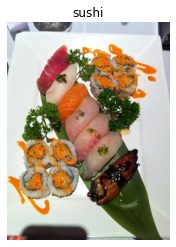

In [21]:
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

view_random_image(target_dir=train_path,
                  target_class=random.choice(class_names))
plt.plot()

## Preprocessing the data

Now it is time for preprocessing, being explisit:

* Scaling (normalizing)
* Reshaping (make all photos the same resolution)
* Batching (creating batches with images)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Reshaping and batching
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode='categorical',
                                               seed = 1203,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_path,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode='categorical',
                                             seed = 1203,
                                             shuffle=True)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Finaly, I got 7500 preprocessed (actually will be preprocessed before fitting) examples for training and 2500 for testing

## Create a model 

Now it is time to create a baseline model

A simple one with not perfect settings

In [31]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy 

# Create architecture
model_18 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')                       
])

# Set regularization 
model_18.compile(optimizer = Adam(),
                 loss = CategoricalCrossentropy(),
                 metrics = ['accuracy'])

## Fit the model

In [32]:
history_18 = model_18.fit(train_data,
                          batch_size=32,
                          epochs=10,
                          steps_per_epoch = len(train_data),
                          validation_batch_size=32,
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 60s 201ms/step - loss: 2.1662 - accuracy: 0.2057 - val_loss: 2.0293 - val_accuracy: 0.2744
Epoch 2/10
235/235 [==============================] - 49s 209ms/step - loss: 1.9679 - accuracy: 0.3064 - val_loss: 2.0194 - val_accuracy: 0.2796
Epoch 3/10
235/235 [==============================] - 45s 193ms/step - loss: 1.8193 - accuracy: 0.3699 - val_loss: 1.8918 - val_accuracy: 0.3436
Epoch 4/10
235/235 [==============================] - 45s 192ms/step - loss: 1.6620 - accuracy: 0.4292 - val_loss: 1.8910 - val_accuracy: 0.3452
Epoch 5/10
235/235 [==============================] - 45s 192ms/step - loss: 1.4818 - accuracy: 0.4929 - val_loss: 1.9662 - val_accuracy: 0.3412
Epoch 6/10
235/235 [==============================] - 46s 196ms/step - loss: 1.2869 - accuracy: 0.5617 - val_loss: 2.0827 - val_accuracy: 0.3336
Epoch 7/10
235/235 [==============================] - 47s 198ms/step - loss: 1.0817 - accuracy: 0.6309 - val_loss: 2.2917 - val_ac

33% is definitely better than guessing (10%), but still, accuracy can be improved and this is the aim of next steps

## Evaluation

79/79 [==============================] - 11s 137ms/step - loss: 3.8637 - accuracy: 0.2848


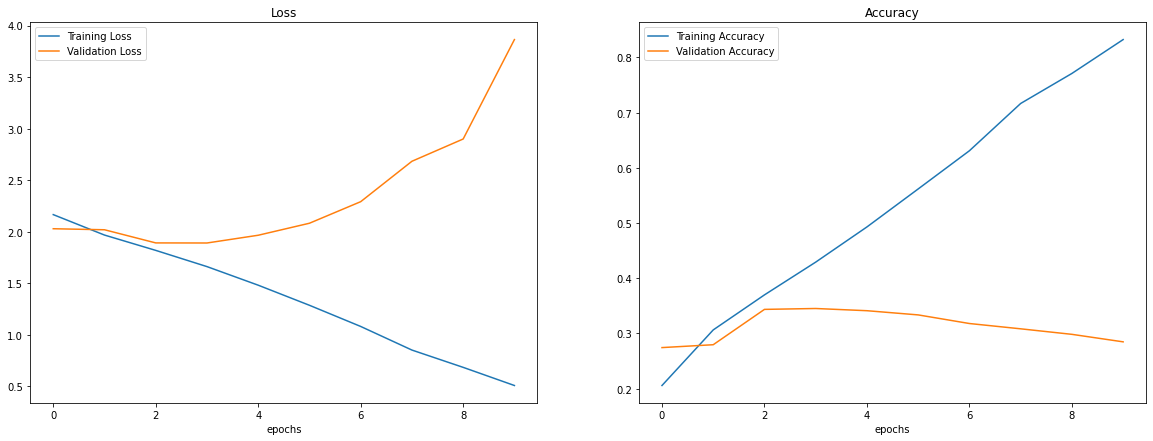

In [33]:
model_18.evaluate(test_data)
plot_loss_curves(history_18)

From the gpaph above it is clearly seen that the overfitting is present in the model

After 2-3 epoch the validation error starts rising, which is a signal of overfitting to training set